<a href="https://colab.research.google.com/github/jeremy-kaigwara/Machine-learning-project-/blob/main/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT  RISK MODELLING 

## Setting the Background
The most pressing questions for banks are how efficiently can we guage the risk profile of our customers and how can we use this information to decide on the required liquidity while still maintaining our regulatory obligations. 

With the constantly changing customer portfolio and the ever increasing customer base a more robust non-hardcoded approach is neccessary to achieve these antagonistic goals. 

Thus comes the idea of using machine learning to develop a behavioural scorecard to pull data from both internal sources, customer transactions and their demographic data, to predict the probability of default. 

In this notebook we are going to explore the data cleaning and transformation as well as machine learing modelling in predicting probability of default. We will then use these results to develop a credit rating. 

Further we will explore the callibration and validation of the developed model to assess compliance with industry benchmarks and regulatory requirements. 

We will eplore the following concepts in the notebook
1. Data cleaning - Struucturing the data for modelling 
2. What to do with missing values 
3. How to deal with class imbalance and the implications. 
4. How to choose the most appropriate modelling technique based on the reporting expectations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline


In [ ]:
#Loading data 
Loan = pd.read_csv("/content/TVS.csv")
Loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [ ]:
#Renaming columns in the dataset with their correct names
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,No of advance EMI paid,Rate of interest,Gender,Employment type,Resident type of customer,Date of birth,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


### First level Data exploration

In [ ]:
#Renaming columns in the dataset with their correct names
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,No of advance EMI paid,Rate of interest,Gender,Employment type,Resident type of customer,Date of birth,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [ ]:
Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [ ]:
Loan_renamed.Tier.unique()

array(['TIER 1', 'TIER 4', 'TIER 3', 'TIER 2'], dtype=object)

As illustrated there are quite a number of features with missing values, we will speak to this in the subsequent sections

In [ ]:
Loan_renamed.tail(5)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,No of advance EMI paid,Rate of interest,Gender,Employment type,Resident type of customer,Date of birth,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
119523,119524,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0,TIER 3,0
119524,119525,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,NaN,0,NaN,NaN,33000.0,NaN,NaN,3,1,0,TIER 3,1
119525,119526,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0,TIER 3,0
119526,119527,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,2,31990.0,0,NaN,31990.0,43600.0,NaN,13.0,0,0,0,TIER 1,0
119527,119528,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,1,NaN,0,NaN,NaN,49900.0,NaN,30.0,4,3,0,TIER 2,0


In [ ]:
Loan_renamed.describe()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,119528.000000,119528.000000,119528.000000,3.662600e+04,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,11.703803,37.003645,3.644385,2.247883,0.909720,2.742192e+05,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,3.980542,9.886047,6.989012,5.387067,2.476597,7.916241e+05,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000e+00,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,9.500000,29.000000,1.000000,1.000000,0.000000,4.190700e+04,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,12.600000,36.000000,1.000000,1.000000,0.000000,9.500000e+04,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,14.090000,45.000000,4.000000,2.000000,1.000000,3.000000e+05,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,20.650000,67.000000,555.000000,523.000000,54.000000,1.000000e+08,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000,1.000000


In [ ]:
# Saving the same for an Excel exploration- usually much quicker
# Loan_renamed.to_csv('credit_default_data.csv')

In [ ]:
# Missing values treatment 
Loan_renamed.dropna(axis=0,how='any',subset=['Loan Amount','Gender'],inplace=True)

Ratio of Male and female who took loan

Text(0.5, 1.0, 'Ratio of male and female who took loan')

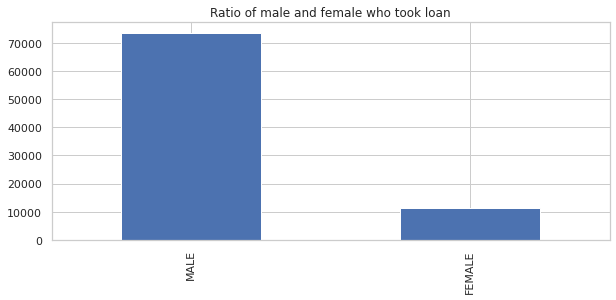

In [ ]:
Loan_renamed.Gender.value_counts().plot(kind = "bar", figsize = (10,4))
plt.title("Ratio of male and female who took loan")

Text(0.5, 1, 'Class counts')

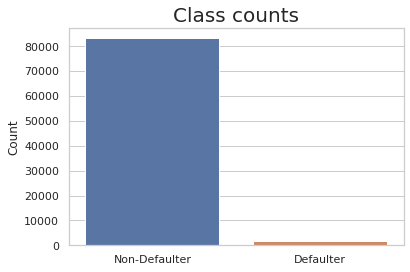

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Getting the number of positive and negative examples. 
sns.countplot(Loan_renamed['Target variable'])
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20})

In [ ]:
Loan_renamed['Target variable'].value_counts()

0    83194
1     1854
Name: Target variable, dtype: int64

The data set is pretty imbalanced as expected where positive examples defualters are significanltly less than 25%. We'll explain in the next section how to handle all of them after giving an overview of ensemble methods


#Loan amount

<font color='blue'>For the three plots about LOAN AMOUNT, you could indicate why each is significant and what insights it gives that are different from the other or maybe what it adds on.</font>

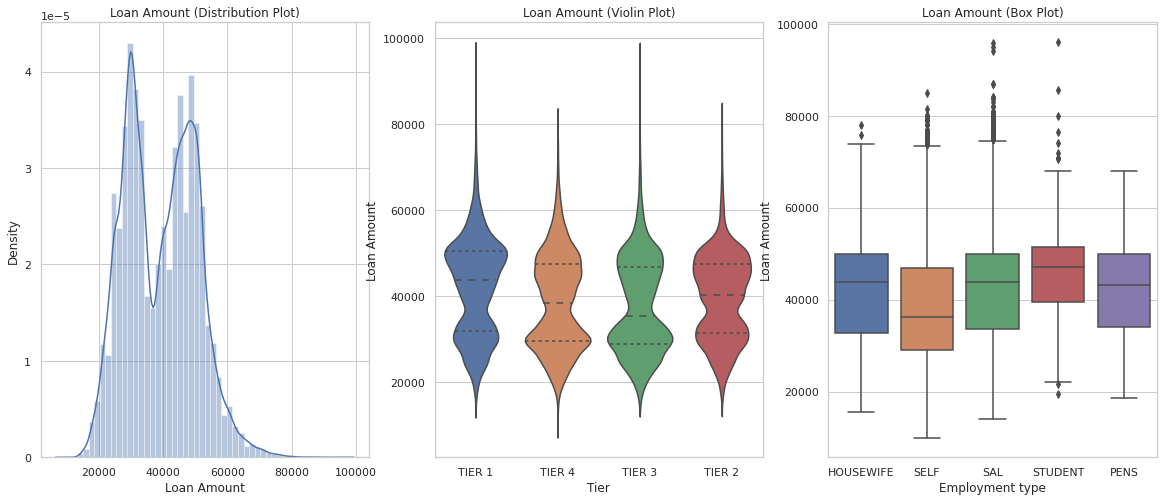

In [ ]:

sns.set(style="whitegrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Loan Amount (Distribution Plot)")
sns.distplot(Loan_renamed['Loan Amount'],ax=ax[0])
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data =Loan_renamed, x='Tier',y='Loan Amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data =Loan_renamed, x='Employment type',y='Loan Amount',ax=ax[2],orient='v')

###Age- age at which the client took the loan

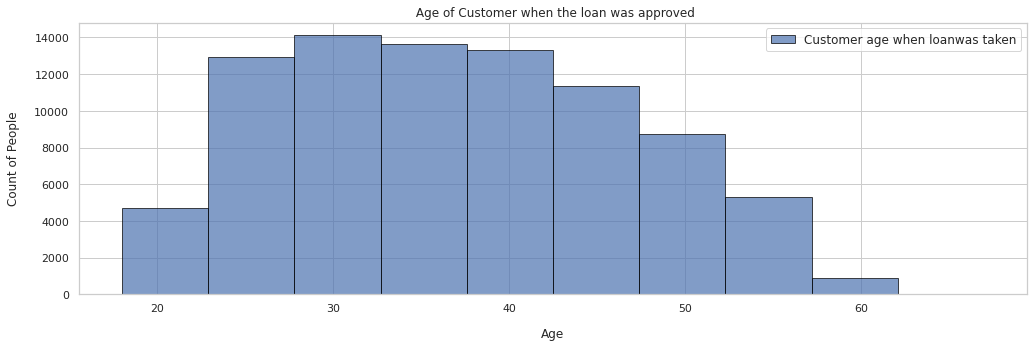

In [ ]:
plt.figure(figsize=(17,5))

#bar plot
Loan_renamed['Customer age when loanwas taken'].plot(kind='hist',color='b',alpha=0.7, edgecolor='black')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

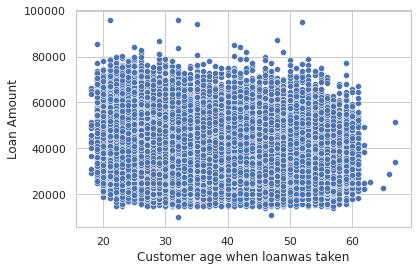

In [ ]:
sns.scatterplot(x=Loan_renamed['Customer age when loanwas taken'],y='Loan Amount',data=Loan_renamed)

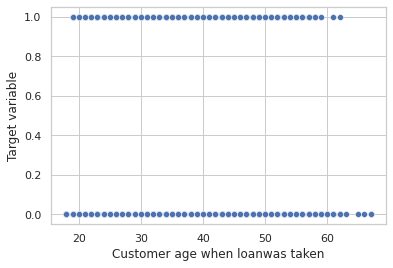

In [ ]:
sns.scatterplot(x=Loan_renamed['Customer age when loanwas taken'],y='Target variable',data=Loan_renamed)

In [ ]:
dropped=['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)',
'Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live','Customer ID','Maximum amount sanctioned for any Two wheeler loan','No of new loans in last 3 months','Gender','Customer has bounced in first EMI','No of secured loans','Employment type','Resident type of customer']

Loan_renamed.drop(dropped,axis=1,inplace=True)

#

## DATA CLEANING 


In [ ]:
data=Loan_renamed.copy()

In [ ]:
CatVariables = data.select_dtypes(include=['object'])
NumVariables = data.select_dtypes(include=['float','int'])

#standardizing column names for easier usage
data.columns=data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
CatVariables=CatVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
NumVariables=NumVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


 # Strategies to deal with missing value
  Almost always real world data sets have missing values. This can be due, for example, users didn't fill some part of the forms or some transformations happened while collecting and cleaning the data before they send it to you. Sometimes missing values are informative and weren't generated randomly. Therefore, it's a good practice to add binary features to check if there is missing values in each row for each feature that has missing values. 
    
In our case, a number of the variables have missing values consistently pointing to a lapse in the data generation process. Thus we will consider deleting these observations only after exploring the performance of the model with imputed values. 
Columns with a significant portion of the observations missing will be dropped as the model we have opted for does not take in missing values. 
    
 Below are some of the most common strategies for dealing with missing values:\n",
- Simply delete all examples that have any missing values. This is usually done if the missing values are very small compared to the size of the data set and the missing values were random. In other words, the added binary features did not improve the model. One disadvantage for this strategy is that the model will throw an error when test data has missing values at prediction.

- Impute the missing values using the mean of each feature separately
- Impute the missing values using the median of each feature separately.
- Use *Multivariate Imputation by Chained Equations (MICE)*. The main disadvantage of MICE is that we can't use it as a transformer in sklearn pipelines and it requires to use the full data set when imputing the missing values. This means that there will be a risk of data leakage since we're using both training and test sets to impute the missing values. 

The following steps explain how MICE works:
- First step: Impute the missing values using the mean of each feature separately.
- Second step: For each feature that has missing values, we take all other features as predictors (including the ones that had missing values) and try to predict the values for this feature using linear regression for example. 
     The predicted values will replace the old values for that feature. We do this for all features that have missing values, i.e. each feature will be used once as a target variable to predict its values and the rest of the time as a predictor to predict other features' values. Therefore, one complete cycle (iteration) will be done once we run the model $k$ times to predict the $k$ features that have missing values. For our data set, each iteration will run the linear regression 6 times to predict the 6 features.
- Third step: Repeat step 2 until there is not much of change between predictions.
- Impute the missing values using K-Nearest Neighbors. We compute distance between all examples (excluding missing values) in the data set and take the average of k-nearest neighbors of each missing value. There's no implementation for it yet in sklearn and it's pretty inefficient to compute it since we'll have to go through all examples to calculate distances. Therefore, we'll skip this strategy in this notebook.

# Imputing missing values 
### To do, investigate them first and document the case for imputation, we might need to drop them. 

In [ ]:
#For quantitative data
from sklearn.impute import SimpleImputer
numerical_cols = data[NumVariables]
categorical_cols = data[CatVariables]

#imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
#lat = imp_mean.fit_transform(numerical_cols)
#imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
#g_se = imp_mode.fit_transform(categorical_cols)

In [ ]:
#data[CatVariables]=g_se
#data[NumVariables]=lat

## Encoding

1. Label encoding 

We can  use  LabelEncoder to encode our variable to numbers. What a label encoder essentially does is that it sees the first value in the column and converts it to 0, next value to 1 and so on.The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship. This approach works reasonably well with tree models

2. One hot encoding 

For categorical variables where no such ordinal relationship exists, the integer/label encoding does not suffice.
In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

So if we have n levels in a category, we will get n-1 features.

In [ ]:
# Dealing with categorical columns
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in CatVariables:
    data[feature] = le.fit_transform(data[feature].astype(str))


In [ ]:
data.isnull().sum()

no_of_times_bounced_12_months                                     0
maximum_mob                                                       0
no_of_times_bounced_while_repaying_the_loan                       0
emi                                                               0
loan_amount                                                       0
tenure                                                            0
dealer_codes_from_where_customer_has_purchased_the_two_wheeler    0
product_code_of_two_wheeler                                       0
no_of_advance_emi_paid                                            0
rate_of_interest                                                  0
date_of_birth                                                     0
customer_age_when_loanwas_taken                                   0
no_of_loans                                                       0
no_of_unsecured_loans                                             0
no_of_times_30_days_past_due_in_last_6_months   

# MODELLING 

In [ ]:
X=data.drop(['target_variable'],axis=1)
y=data[["target_variable"]]

In [ ]:
# print((X.shape, y.shape))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4,min_samples_leaf=3, random_state = 10) 
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
yhat = model.predict(x_test)
print(f'Your train accuracy is: {accuracy_score(y_test,yhat)}')

pred_train = model.predict(x_train)
print(f'Your prediction is: {accuracy_score(y_train,pred_train)}')


Your train accuracy is: 0.9783264746227709
Your prediction is: 0.9781465741689483


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.967608433921731

In [ ]:
## Use the confusion matrix to visualize the precision and recall - and understand the effect of class imbalance in prediction
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     24962
           1       0.00      0.00      0.00       553

    accuracy                           0.98     25515
   macro avg       0.49      0.50      0.49     25515
weighted avg       0.96      0.98      0.97     25515

Confusion matrix, without normalization
[[    0   553]
 [    0 24962]]


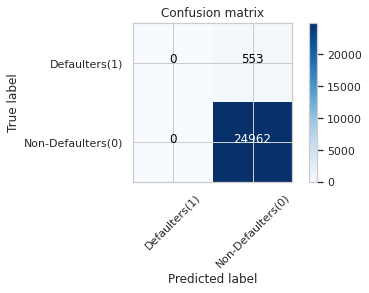

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defaulters(1)','Non-Defaulters(0)'],normalize= False,  title='Confusion matrix')

>  Clearly, the model has not leant enough examples of the default class, thus the predictions are for the non-defualters, and given their numbers, any complete prediction of the non-default class will give a misleading value of the perfomance metric

Yeah looks like we will consider class imbalance handling for better unbiased results : smote , upsampling : rose and all that would be necessary 

## SMOTE
S𝒚𝒏𝒕𝒉𝒆𝒕𝒊𝒄 𝒎𝒊𝒏𝒐𝒓𝒊𝒕𝒚 𝒐𝒗𝒆𝒓𝒔𝒂𝒎𝒑𝒍𝒊𝒏𝒈 𝒕𝒆𝒄𝒉𝒏𝒊𝒒𝒖𝒆- creates examples of the minority class by looking at the distribution of the minority class and "guesses" what the other cases would have been 
- pick two points that are relatively closer to each other distance wise 
-  draw a line 
- generate a new point along that line 

It doesn't always work but a lot of time it works and it is a good technique to look at when there is no way of generating more data and the aforementioned techniques are not applicable per se 
It is better for increasing precision(𝙥𝙤𝙨𝙞𝙩𝙞𝙫𝙚 𝙞𝙙𝙚𝙣𝙩𝙞𝙛𝙞𝙚𝙙 𝙖𝙨 𝒕𝒉𝒂𝒕 𝒂𝒓𝒆 𝒑𝒐𝒔𝒊𝒕𝒊𝒗𝒆 ) but this comes at the cost of recall (𝒐𝒖𝒕 𝒐𝒇 𝒂𝒍𝒍 𝒕𝒉𝒆 𝒑𝒐𝒔𝒊𝒕𝒊𝒗𝒆𝒔 𝒘𝒉𝒊𝒄𝒉 𝒐𝒏𝒆𝒔 𝒉𝒂𝒗𝒆 𝒃𝒆𝒆𝒏 𝒄𝒐𝒓𝒓𝒆𝒄𝒕𝒍𝒚 𝒊𝒅𝒆𝒏𝒕𝒊𝒇𝒊𝒆𝒅)


In [ ]:
! pip install imblearn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f753116f950>]],
      dtype=object)

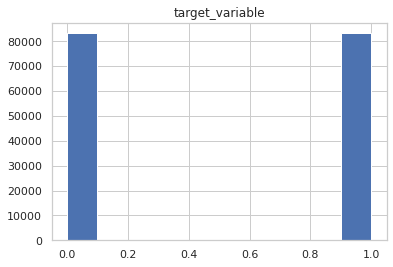

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote_sample=SMOTE(random_state=124,sampling_strategy='auto') # the sampling strategy can be one of float, str, dict or callable `float``,
#it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling ie {1:500}
# ``'minority'``: resample only  minority class; 'not minority'``:all but the minority class; ``'not majority'``: all but the majority, ``'all'`` ,``'auto'``:
x_res, y_res=smote_sample.fit_resample(X,y)


# now plot the classes
y_res.hist()

With SMOTE we get a feature space with a similar distribution to the original data set, except that in this case we actually have a balanced ratio of the negative and positive examples. Thus our model should be able to learn the patterns associated with both defaults and non-defaults. Here we are interested in both an increase in precision and recall. 

In [ ]:
print(x_res.shape,y_res.shape)

(166388, 18) (166388, 1)


### Re-Building the algorithm with the balanced data


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size = 0.3, random_state = 10)
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
yhat = model.predict(x_test)
print(f'Your test accuracy is: {accuracy_score(y_test,yhat)}')

pred_train = model.predict(x_train)
print(f'Your prediction is: {accuracy_score(y_train,pred_train)}')

# If you choose class_weight = "balanced", the classes will be weighted inversely proportional to how frequently
#  they appear in the data.

Your test accuracy is: 0.8306789270188513
Your prediction is: 0.8298718135844975


              precision    recall  f1-score   support

           0       0.82      0.85      0.83     24988
           1       0.85      0.81      0.83     24929

    accuracy                           0.83     49917
   macro avg       0.83      0.83      0.83     49917
weighted avg       0.83      0.83      0.83     49917

Confusion matrix, without normalization
[[20109  4820]
 [ 3632 21356]]


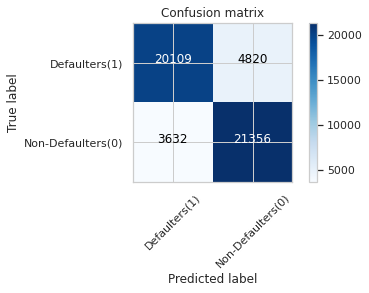

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defaulters(1)','Non-Defaulters(0)'],normalize= False,  title='Confusion matrix')

Using the balanced data we are able to see a more realistic results of the F1 score. As a bank we would be interested in a balanced value of precision and recall. 

We want to avail loans to the maximum customer base, thus we want to avoid a situaton where the model would flag an individual as a defaulter when it is the case that they are not. 
On the other hand we would also want to reduce LGD, Loss Given defautlt, by having a model with a higher recall value, in the sense, that when one applying for a facility is a defaulter, they need to be flagged as such. 

##  FEATURE IMPORTANCE 
- This is optional and it is a compensating control to ensure the model is not overlearning on one feauture. 

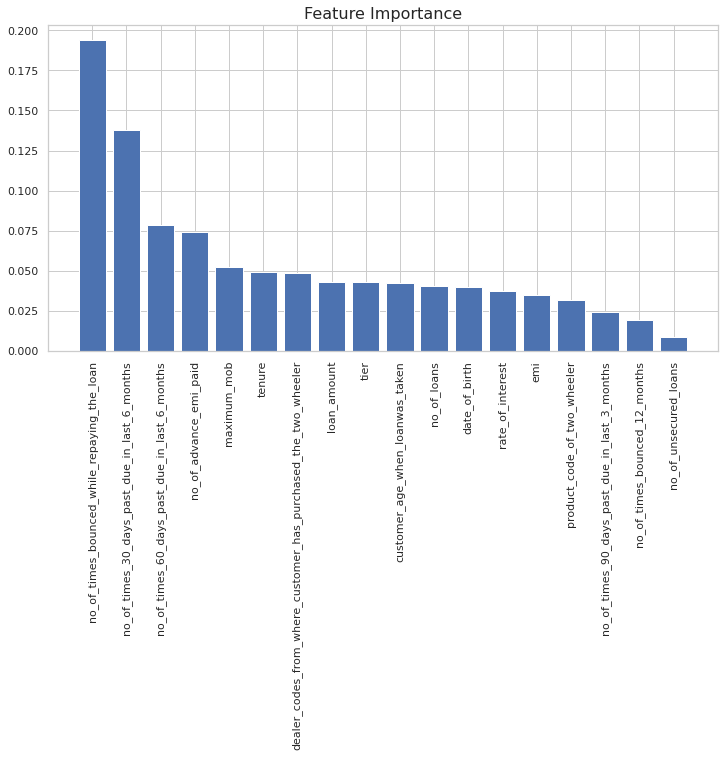

In [ ]:
# from sklearn.preprocessing import  RobustScaler, FunctionTransformer
# Build random forest classifier
rf_clf = RandomForestClassifier(n_estimators=500,
                                max_features=0.25,
                                criterion="entropy",
                                class_weight="balanced")

from sklearn.preprocessing import RobustScaler
# fit RF to plot feature importances
rf_clf.fit(RobustScaler().fit_transform(SimpleImputer(strategy="median").fit_transform(x_train)), y_train)

# Plot features importance
importances = rf_clf.feature_importances_
indices = np.argsort(rf_clf.feature_importances_)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, 19), importances[indices], align="center")
plt.xticks(range(1, 19), data.columns[data.columns != "target_variable"][indices], rotation=90)
plt.title("Feature Importance", {"fontsize": 16});

Tuning (it is worth noting that feature engineering is of much importance than hyperparametere tuning as the perfomance  improvement with the latter is always only marginal)

# MODEL VALIDATON


## Generating credit scores

In [ ]:
y_hat=model.predict(x_test)
y_hat_2=(model.predict_proba(x_test)[:,1]>0.3).astype(int)
## It is worth noting that one can vary the threshold for default given the lending facility's risk appetite. 
print(f1_score(y_test,y_hat),f1_score(y_test,y_hat_2))

0.8263406615985206 0.8151689853971761


In [ ]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(y_test,y_hat),recall_score(y_test,y_hat_2))

0.8066508885234065 0.9472100766175939


#### The following forms our basis for rank ordering 
0 - 200 Bad Customer ,
- 201-350 2nd Worst, 
- 351 - 500 Not So bad,
- 501 - 700 Ideal guys, 
- 700> Big loans 

In [ ]:
(model.predict_proba(x_test)[:,1]>0.5).astype(int)

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
model.predict_proba(x_test)[0:10,1]

array([0.42, 0.85, 0.23, 0.73, 0.83, 0.21, 0.54, 0.23, 0.12, 0.24])

In [ ]:
(1-model.predict_proba(x_test)[0:10,1])*1000

array([579.57, 152.53, 771.96, 274.58, 168.  , 792.22, 457.38, 767.64,
       884.5 , 764.93])

In [ ]:
x_test['score']=(1-model.predict_proba(x_test)[:, 1])*1000
x_test['risk']=y_hat

In [ ]:
x_test.head(4)

,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,no_of_advance_emi_paid,rate_of_interest,date_of_birth,customer_age_when_loanwas_taken,no_of_loans,no_of_unsecured_loans,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,score,risk
147007,0,14.620352,0.062035,2612.208226,39004.652641,18.372211,3472.932691,0,0.000000,14.720597,827,29.186106,1,0,0,0,0,3,579.566456,0
87113,0,19.207435,0.867906,2349.853278,46466.047076,23.603718,2733.980422,2,1.264188,9.734491,2243,46.660471,4,2,8,7,2,1,152.534304,1
10023,0,21.000000,0.000000,2048.000000,39000.000000,24.000000,3946.000000,0,0.000000,13.000000,1601,35.000000,1,0,0,0,0,1,771.960688,0
106112,0,12.308281,0.000000,2456.968000,33930.828108,15.924843,3906.620064,0,2.075157,10.996910,53,23.233124,1,0,3,2,1,2,274.582843,1


In [ ]:
# Export the model scores result to CSV to be able to perform rank ordering within Excel template provided
x_test.to_csv('credit-risk-scores-vjc.csv')

In [ ]:
probs=model.predict_proba(x_train)